# Employee Churn Prediction

#### Predicting employee churn using four different classifers, namely Logistic Regression, Decision Tree, Random Forest, and Artifical Neural Networks.

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = pd.read_csv("Human_Resources.csv")

<AxesSubplot:>

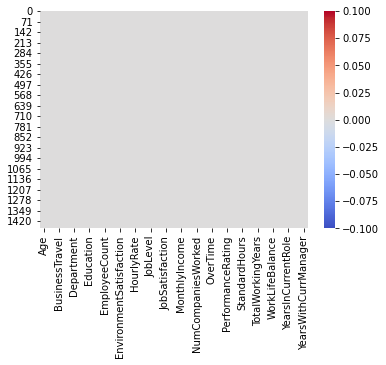

In [21]:
sns.heatmap(df.isnull(), cmap = "coolwarm")

In [22]:
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [23]:
df["Attrition"] = df["Attrition"].apply(lambda x : 1 if x == "Yes" else 0)
df["OverTime"] = df["OverTime"].apply(lambda x : 1 if x == "Yes" else 0)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'OverTime'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'

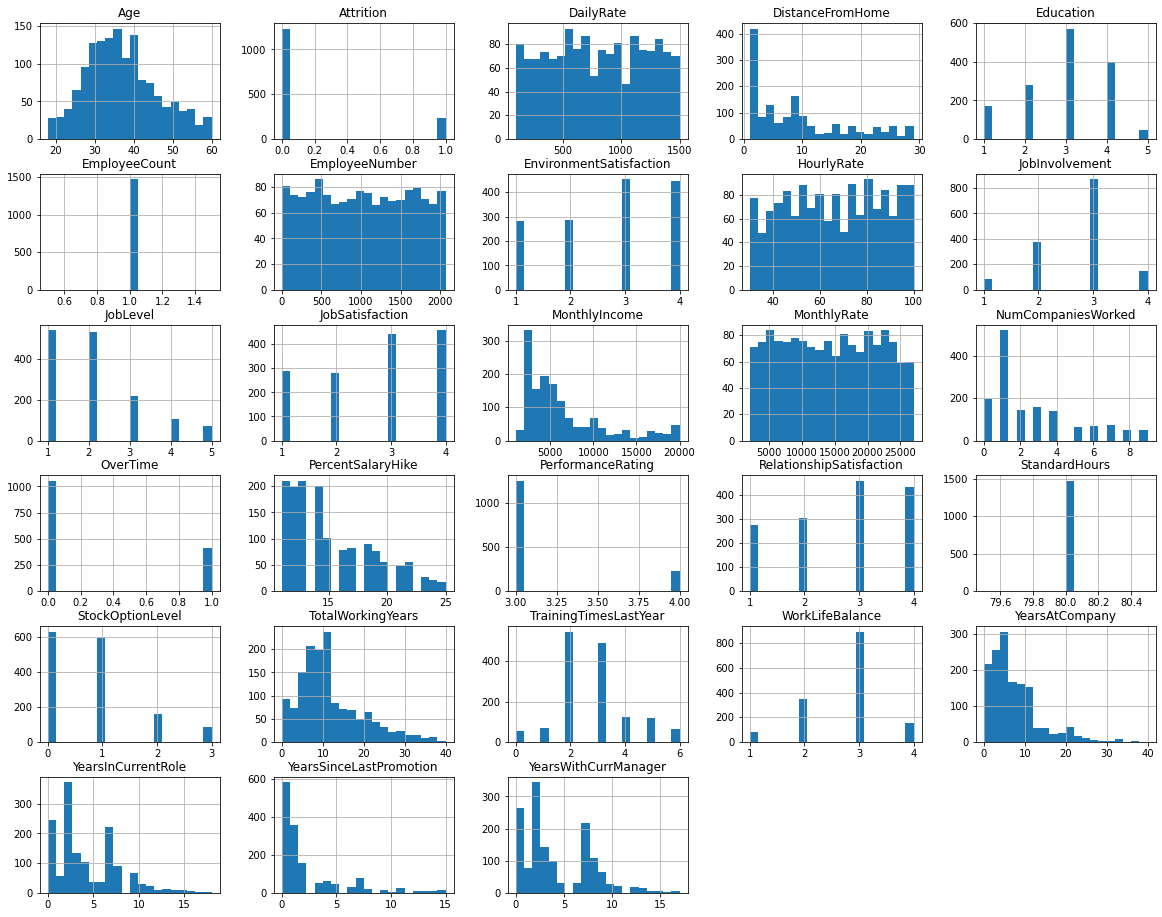

In [24]:
df.hist(figsize=(20,16), bins = 20)

In [25]:
df = df.drop(["EmployeeCount","StandardHours"], axis = 1)

<AxesSubplot:title={'center':'Correlation Matrix'}>

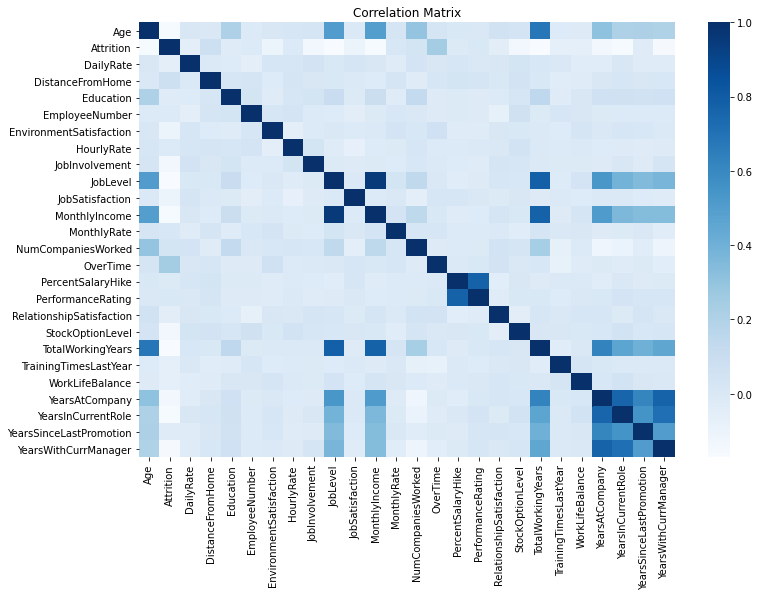

In [26]:
plt.figure(figsize = (12,8))
plt.title("Correlation Matrix")
sns.heatmap(df.corr(),cmap = "Blues")

<AxesSubplot:title={'center':'Correlation Plot'}>

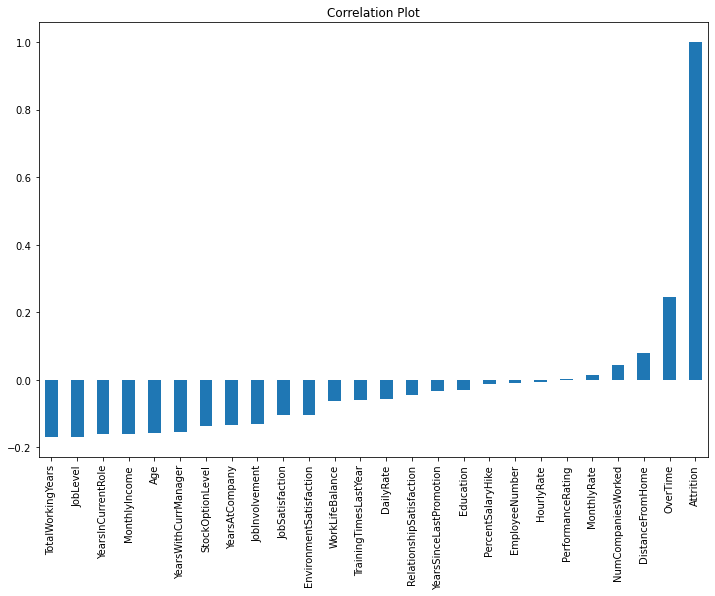

In [27]:
plt.figure(figsize = (12,8))
plt.title("Correlation Plot")
df.corr()["Attrition"].sort_values().plot(kind = "bar")

<AxesSubplot:title={'center':'Overtime distribution among employees who left'}, xlabel='Overtime', ylabel='No. of Employees Who Left'>

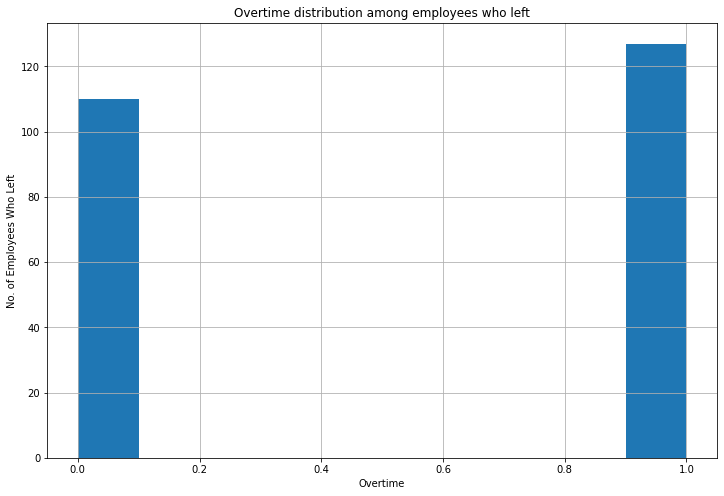

In [28]:
plt.xlabel("Overtime")
plt.ylabel("No. of Employees Who Left")
plt.title("Overtime distribution among employees who left")
df[df["Attrition"]==1]["OverTime"].hist(figsize = (12,8))

<AxesSubplot:title={'center':'Attrition by Department'}, xlabel='Department', ylabel='count'>

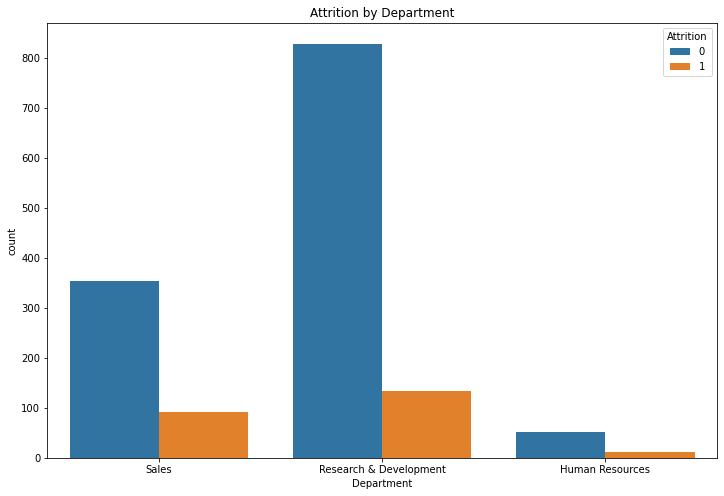

In [29]:
plt.figure(figsize = (12,8))
plt.xlabel("Department")
plt.ylabel("No. of Employees")
plt.title("Attrition by Department")
sns.countplot(x = df["Department"], hue = df["Attrition"])

<AxesSubplot:title={'center':'Distribution of Monthly Income by Department and Attrition'}, xlabel='Department', ylabel='MonthlyIncome'>

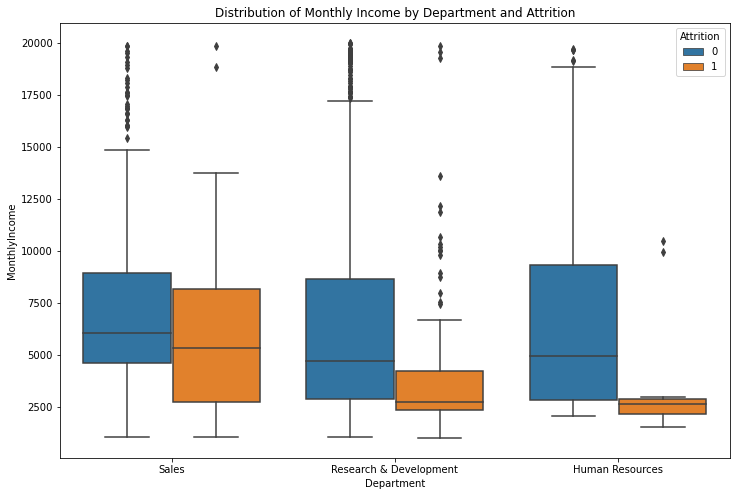

In [30]:
plt.figure(figsize = (12,8))
plt.xlabel("Department")
plt.ylabel("No. of Employees")
plt.title("Distribution of Monthly Income by Department and Attrition")
sns.boxplot(x=df["Department"], y = df["MonthlyIncome"], hue= df["Attrition"])

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

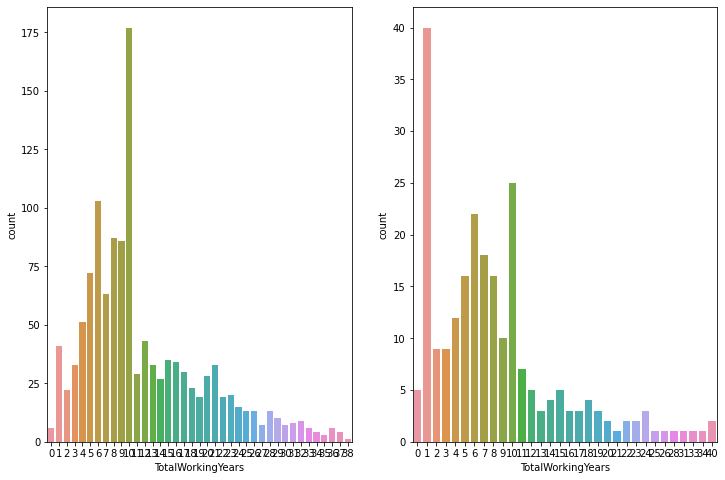

In [31]:
plt.figure(figsize = (12,8))
plt.subplot(1, 2, 1)
sns.countplot(df[df["Attrition"]==0]["TotalWorkingYears"])
plt.subplot(1, 2, 2)
sns.countplot(df[df["Attrition"]==1]["TotalWorkingYears"])

<AxesSubplot:xlabel='JobRole', ylabel='count'>

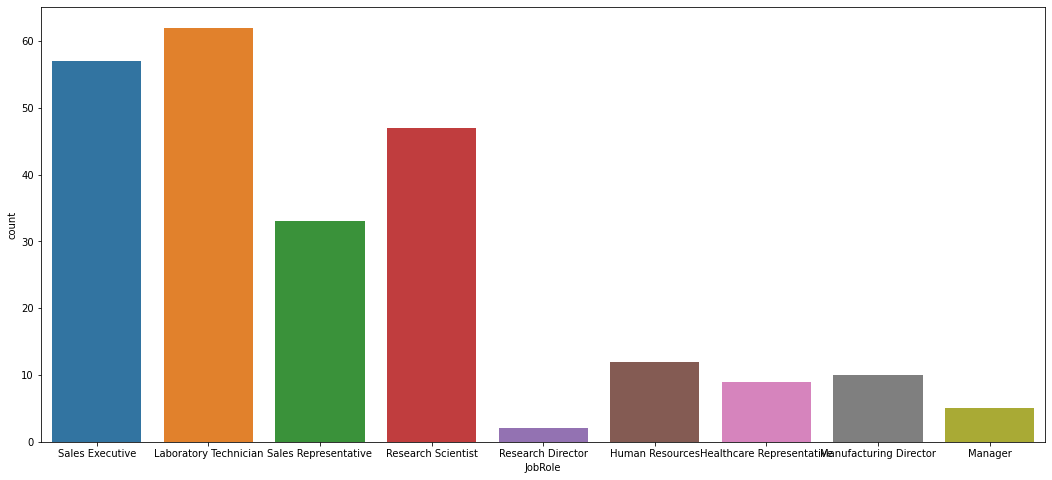

In [32]:
plt.figure(figsize = (18,8))
sns.countplot(df[df["Attrition"]==1]["JobRole"])

In [33]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,0,12,3,4,1,6,3,3,2,2,2,2


In [34]:
#Creating Dummy values
BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, 

NameError: name 'BusinessTravel' is not defined

In [ ]:
df = pd.get_dummies(df, columns = ["BusinessTravel","Department","EducationField","Gender",
                       "JobRole","MaritalStatus"],drop_first=True)

In [ ]:
df.head()

In [ ]:
#Dropping Over18 column as all the values are "Y"
df = df.drop(["Over18"],axis=1)

In [ ]:
df.head()

In [ ]:
df.hist(figsize=(20,16), bins = 20)

In [ ]:
X = df.drop(["Attrition"],axis = 1)
y = df["Attrition"]

In [ ]:
#Train-test Split and Scaling Step

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
#Scaling step
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Artificial Neural Network Model

In [ ]:
#Model Building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

ANN_model = Sequential()

ANN_model.add(Dense(45,activation = "relu"))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(25,activation = "relu"))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(13,activation = "relu"))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(1,activation = "sigmoid"))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "val_loss", patience = 10)

In [ ]:
ANN_model.compile(loss = "binary_crossentropy", optimizer = "adam")

In [ ]:
#Fitting the model to train data

ANN_model.fit(X_train, y_train, epochs = 250, validation_data=(X_test,y_test),
             callbacks=[early_stop])

In [ ]:
pd.DataFrame(ANN_model.history.history).plot()

In [ ]:
print(ANN_model.metrics_names)
print(ANN_model.evaluate(X_test,y_test))

In [ ]:
ANN_prediction = ANN_model.predict(X_test)
ANN_prediction = pd.DataFrame(ANN_prediction, columns=["pred"])
ANN_prediction["pred"] = ANN_prediction["pred"].apply(lambda x: 1 if x>=0.5 else 0)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,ANN_prediction["pred"]))
print(confusion_matrix(y_test,ANN_prediction["pred"]))

## Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
tree_prediction = dtree.predict(X_test)

In [ ]:
print(classification_report(y_test,tree_prediction))
print(confusion_matrix(y_test,tree_prediction))

## Random Forest Classifier Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF_prediction = RF.predict(X_test)

In [ ]:
print(classification_report(y_test,RF_prediction))
print(confusion_matrix(y_test,RF_prediction))

## Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_prediction = log_model.predict(X_test)

In [ ]:
print(classification_report(y_test,log_prediction))
print(confusion_matrix(y_test,log_prediction))

## Key Takeaways

- Given the size of the dataset and imbalanced data, a simple logistic regression model performed slightly better than the other classifier models 
- Along with other KPIs, the most important performance indicator to compare the models would be the f1-score in this case as we are dealing with uneven class distribution, more 0s than 1s, or a distribution of 85/15  